# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Authors:** Chun-Hung Yeh, Kuan Tung, Zhuoyue Wang  
**Group:** 5  
**Due date:** 08.05.2020

[iapr2020]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

In order to make reasonable hypotheses about the data, we have to first plot them and check the distributions of those classes.

In [3]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

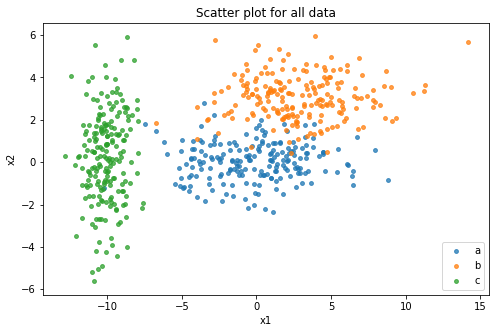

In [4]:
# plot all data
all_data = [a, b, c]
plt.figure(figsize=(8, 5))
for data in all_data:
    plt.scatter(data[:, 0], data[:, 1], s=15, alpha=0.75)
axis_lim = plt.axis()
plt.title('Scatter plot for all data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['a', 'b', 'c'], loc='lower right')
plt.show()

It seems like their distribution are Gaussian. Class a and b probably have similar variances and class c has different variances.

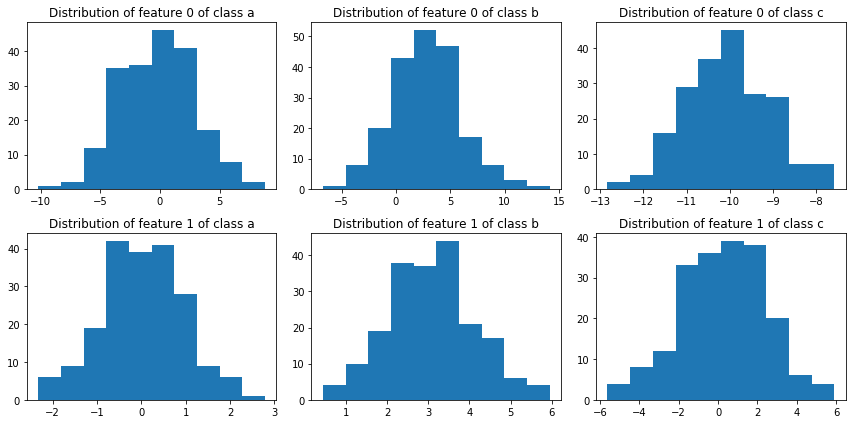

In [5]:
# plot distribution of features
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
class_names = ['a', 'b', 'c']
for fi in range(2):
    for ci in range(3):
        axes[fi, ci].hist(all_data[ci][:, fi])
        axes[fi, ci].set_title(f'Distribution of feature {fi} of class {class_names[ci]}')
fig.tight_layout()

Looking at the actual distribution of the features, we can be more confident in saying that the distributions of these classes are Gaussian.

**Our hypotheses:**  

1. The distribution of the features of these classes are i.i.d. Gaussian.
2. Priors are the same since we have the same number of data for each class.

For each class, we have $n$ data points, then
$$X = 
\left[
\begin{matrix}
 x_{11}      & x_{12}      \\
 x_{21}      & x_{22}      \\
 \vdots & \vdots     \\
 x_{n1}      & x_{n2}      \\
\end{matrix}
\right]$$

Using **maximum likelihood estimator**, the mean value $\mu$ can be estimated as

$$\hat\mu = \left[
\begin{matrix}
 \cfrac{1}{n}\sum_{j=1}^{n}{x_{j1}}      & \cfrac{1}{n}\sum_{j=1}^{n}{x_{j2}}  
\end{matrix}
\right]$$


and the covariance matrix $\Sigma$ can be estimated as

$$\hat\Sigma ＝ \cfrac{1}{n}(X-\hat\mu)^T(X-\hat\mu) \quad \text{with } \hat\Sigma_{12}=\hat\Sigma_{21}=0 \text{ (because of i.i.d. Gaussian assumption)}$$

In [6]:
means = [data.mean(axis=0).round() for data in all_data]
for i in range(3):
    print(f'Means of class {class_names[i]}: {means[i]}')

Means of class a: [-0.  0.]
Means of class b: [3. 3.]
Means of class c: [-10.   0.]


In [7]:
covs = [np.diag(np.cov(data[:, 0], data[:, 1]).round()) for data in all_data]
for i in range(3):
    print(f'Covariance of class {class_names[i]}: \n{covs[i]}')

Covariance of class a: 
[10.  1.]
Covariance of class b: 
[10.  1.]
Covariance of class c: 
[1. 5.]


The decision curves are computed as followed:
$$\text{For a & b:}\quad \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_1-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_1-\mu_{b2})^2}{\sigma_{b2}^2} $$
$$\text{For a & c:}\quad \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_1-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{c1})^2}{\sigma_{c1}^2} + \cfrac{(x_1-\mu_{c2})^2}{\sigma_{c2}^2} $$
$$\text{For b & c:}\quad \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_1-\mu_{b2})^2}{\sigma_{b2}^2} =  \cfrac{(x_1-\mu_{c1})^2}{\sigma_{c1}^2} + \cfrac{(x_1-\mu_{c2})^2}{\sigma_{c2}^2} $$

Plug in the estimated parameters:
$$\hat\mu_a = [0, 0],\quad \hat\mu_b = [3, 3],\quad \hat\mu_c = [-10, 0]$$
$$\hat\sigma_a^2=[10, 1],\quad \hat\sigma_b^2=[10, 1],\quad \hat\sigma_c^2=[1, 5]$$

We get the three curves as following:

$$\text{For a & b:}\quad 2x_1+20x_2-33=0$$

$$\text{For a & c:}\quad 0.9x_1^2+20x_1-0.8x_2^2+100=0$$

$$\text{For b & c:}\quad 0.9x_1^2+20.6x_1-0.8x_2^2+6x_2+90.1=0$$

Let's draw the curves.

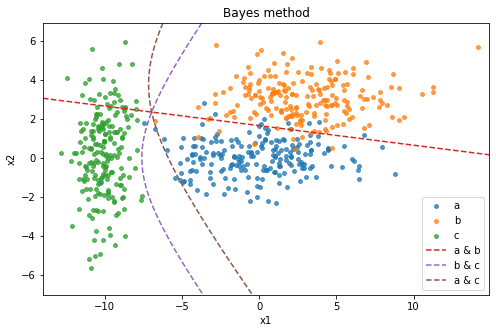

In [8]:
# plot all data and separation curves
plot_handles = []
plt.figure(figsize=(8, 5))
for idx, data in enumerate(all_data):
    tmp = plt.scatter(data[:, 0], data[:, 1], label=class_names[idx], s=15, alpha=0.75)
    plot_handles.append(tmp)

# use meshgrid to create points which will later be fed to the curve function
X1, X2 = np.meshgrid(np.arange(-14, 15, 0.1), np.arange(-7, 7, 0.1))
params = [
    (0, 2, 0, 20, -33),
    (0.9, 20, -0.8, 0, 100),
    (0.9, 20.6, -0.8, 6, 90.1)
]
dc_value = lambda p: p[0] * X1 ** 2 + p[1] * X1 + p[2] * X2 ** 2 + p[3] * X2 + p[4]

# calculate decision curve value and plot them
ab_dc_value = dc_value(params[0])
bc_dc_value = dc_value(params[1])
ac_dc_value = dc_value(params[2])
dc_values = [ab_dc_value, bc_dc_value, ac_dc_value]
curve_colors = ['C3', 'C4', 'C5']

for i in range(3):
    tmp = plt.contour(X1, X2, dc_values[i], 0, linestyles='dashed', colors=curve_colors[i])
    plot_handles.append(tmp.collections[0])

plt.title('Bayes method')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(plot_handles, ['a', 'b', 'c', 'a & b', 'b & c', 'a & c'], loc='lower right')
plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

We can build the **Minimal Distance Classifier** based on Mahalanobis distance.

The minimal distance classifier is
$$
Class=\left\{
\begin{array}{rcl}
a & & {d_a < d_b}\\
b & & {d_b < d_a}
\end{array} \right.
$$

Mahalanobis distance is defined as:
$
d_m = \left((x-\mu_i)\Sigma_i^{-1}(x-\mu_i)^T\right)^{1/2}
$


The decision curve is where the distances to each class are the same, i.e. $d_a=d_b$.

$$d_a = \left((x-\mu_a)\Sigma_a^{-1}(x-\mu_a)^T\right)^{1/2},  d_b = \left((x-\mu_b)\Sigma_b^{-1}(x-\mu_b)^T\right)^{1/2}$$

$$d_a=d_b \Rightarrow \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_1-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_1-\mu_{b2})^2}{\sigma_{b2}^2}$$

In [9]:
# inverse of covariance matrix for each class
cov_a_inv = np.linalg.inv(np.diag(covs[0]))
cov_b_inv = np.linalg.inv(np.diag(covs[1]))

print(cov_a_inv)
print(cov_b_inv)

[[0.1 0. ]
 [0.  1. ]]
[[0.1 0. ]
 [0.  1. ]]


As estimated previously, we can get the inversed estimated covarance matrix as
$$
\hat\Sigma_a^{-1}
=
\hat\Sigma_b^{-1}
=
\left[\begin{matrix}
0.1      & 0     \\
0     & 1
\end{matrix}\right]
$$

and estimated mean values of two classes as:
$$\hat\mu_a = [0, 0], \hat\mu_b = [3, 3]$$

Plug in the estimated parameters, the decision curve is given as:
$$2x_1+20x_2-33=0$$

**Comparision**

In the training dataset there are the same number of points of class a and b, which leads to **the same prior probabilities** of two classes.

Thus, in our case, the decision boundary of the Bayes Classifier is the same as that of the Minimal Mahalanobis Distance Classifier.

Now, let's use Mahalanobis distance for classification.

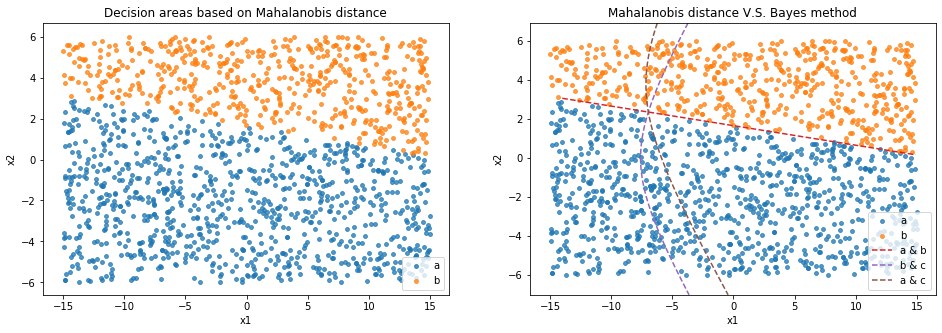

In [10]:
# compute the joint Mahalanobis distance according to all classes
dist_a = lambda x: np.sqrt((x - means[0]).dot(cov_a_inv).dot((x - means[0]).T))
dist_b = lambda x: np.sqrt((x - means[1]).dot(cov_b_inv).dot((x - means[1]).T))
clf_m = lambda x: np.argmin([dist_a(x), dist_b(x)])

# generate random points to find out the decision areas
rng = np.random.RandomState(0)
X_new = np.array([-15, -6] + [30, 12] * rng.rand(1500, 2))
y_new = np.array([clf_m(x) for x in X_new])

# visualize
plot_handles = []
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# plot points (2 classes, a and b)
for i in range(2):
    tmp = axes[0].scatter(X_new[y_new == i][:, 0], X_new[y_new == i][:, 1], s=15, alpha=0.75)
    plot_handles.append(tmp)
axes[0].set_title("Decision areas based on Mahalanobis distance")
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].legend(['a', 'b'], loc='lower right')

# plot points (2 classes, a and b)
plot_handles = []
for i in range(2):
    tmp = axes[1].scatter(X_new[y_new == i][:, 0], X_new[y_new == i][:, 1], s=15, alpha=0.75)
    plot_handles.append(tmp)
# plot bayes method decision curves
for i in range(3):
    tmp = axes[1].contour(X1, X2, dc_values[i], 0, linestyles='dashed', colors=curve_colors[i])
    plot_handles.append(tmp.collections[0])
axes[1].set_title("Mahalanobis distance V.S. Bayes method")
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].legend(plot_handles, ['a', 'b', 'a & b', 'b & c', 'a & c'], loc='lower right')
plt.show()

The classification results of class a and b are the same. It's quite impressive that a simple method can also achieve the same result.

We are also curious what if we include class c.

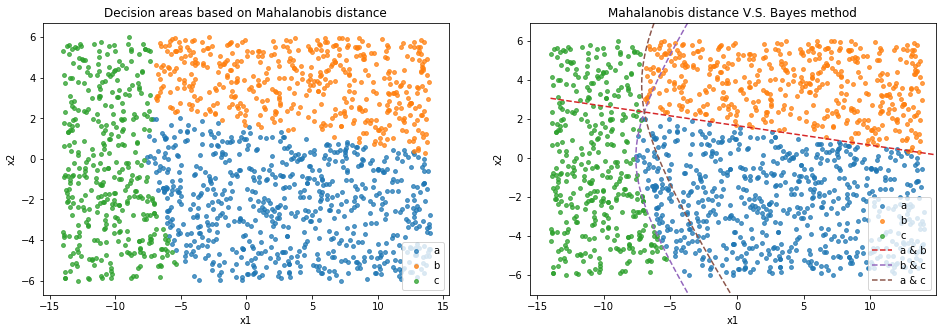

In [11]:
# compute the joint Mahalanobis distance according to all classes
cov_c_inv = np.linalg.inv(np.diag(covs[2]))
dist_a = lambda x: np.sqrt((x - means[0]).dot(cov_a_inv).dot((x - means[0]).T))
dist_b = lambda x: np.sqrt((x - means[1]).dot(cov_b_inv).dot((x - means[1]).T))
dist_c = lambda x: np.sqrt((x - means[2]).dot(cov_c_inv).dot((x - means[2]).T))
clf_m = lambda x: np.argmin([dist_a(x), dist_b(x), dist_c(x)])

# generate random points to find out the decision areas
rng = np.random.RandomState(0)
X_new = np.array([-14, -6] + [28, 12] * rng.rand(1500, 2))
y_new = np.array([clf_m(x) for x in X_new])

# visualize
plot_handles = []
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# plot points (3 classes)
for i in range(3):
    tmp = axes[0].scatter(X_new[y_new == i][:, 0], X_new[y_new == i][:, 1], s=15, alpha=0.75)
    plot_handles.append(tmp)
axes[0].set_title("Decision areas based on Mahalanobis distance")
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].legend(['a', 'b', 'c'], loc='lower right')

# plot points (3 classes)
plot_handles = []
for i in range(3):
    tmp = axes[1].scatter(X_new[y_new == i][:, 0], X_new[y_new == i][:, 1], s=15, alpha=0.75)
    plot_handles.append(tmp)
# plot bayes method decision curves
for i in range(3):
    tmp = axes[1].contour(X1, X2, dc_values[i], 0, linestyles='dashed', colors=curve_colors[i])
    plot_handles.append(tmp.collections[0])
axes[1].set_title("Mahalanobis distance V.S. Bayes method")
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].legend(plot_handles, ['a', 'b', 'c', 'a & b', 'b & c', 'a & c'], loc='lower right')
plt.show()

The results are almost the same. The only difference is for Bayes method there are two regions which are not uniquely defined as one class and Mahalanobis distance method classifies them as class b and a. So Mahalanobis distance method is even better considering this problem since there will be no ambiguity.

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [12]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [13]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

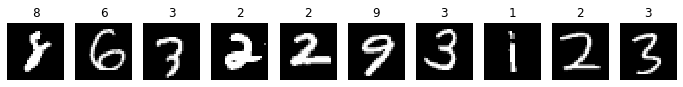

In [14]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*

In [15]:
# import packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

First we have to flatten the 2D images into 1D vectors. We also normalize the pixel values to the range [0, 1] because it will help the MLP better converges. We normalize them by dividing 255.

In [16]:
# flatten and normalize images
train_images_flat = train_images.reshape(-1, image_shape[0] * image_shape[1]) / 255.
test_images_flat = test_images.reshape(-1, image_shape[0] * image_shape[1]) / 255.

The MLPClassifier from [scikit-learn](http://scikit-learn.org/stable/index.html) supports multi-class classification by applying Softmax as the output function. We should transform the labels into one hot encodings to fit the model. 

In [17]:
# transform labels to one hot encodings
enc = OneHotEncoder(categories='auto')
# adding an extra dimension which is required by the fit function
enc.fit(train_labels.reshape(-1, 1))
train_onehots = enc.transform(train_labels.reshape(-1, 1)).toarray()
test_onehots = enc.transform(test_labels.reshape(-1, 1)).toarray()

After the above preparations, we can train the model. It's simple to train the model using [scikit-learn](http://scikit-learn.org/stable/index.html). We just need one line to setup the model and another line to train the model. We list the parameters we set in the following,

1. Hidden layer sizes are set to 100.
2. We use [Adam](https://arxiv.org/abs/1412.6980) optimizer to update the weights.
3. Early stopping is set to avoid unnecessary training iterations. It will set aside 10% of training data as validation and show the validation accuracy when training.
4. Verbose is set to see training progress

In [18]:
# setup the classifier and train the model
mlp_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, ), random_state=1, early_stopping=True, verbose=True)
mlp_clf.fit(train_images_flat, train_onehots)

Iteration 1, loss = 1.23568613
Validation score: 0.837667
Iteration 2, loss = 0.57030719
Validation score: 0.884333
Iteration 3, loss = 0.42922981
Validation score: 0.904833
Iteration 4, loss = 0.34953916
Validation score: 0.920167
Iteration 5, loss = 0.29699709
Validation score: 0.927500
Iteration 6, loss = 0.25995196
Validation score: 0.933833
Iteration 7, loss = 0.23018282
Validation score: 0.938167
Iteration 8, loss = 0.20774224
Validation score: 0.942000
Iteration 9, loss = 0.18796291
Validation score: 0.945333
Iteration 10, loss = 0.17193599
Validation score: 0.948500
Iteration 11, loss = 0.15705240
Validation score: 0.949500
Iteration 12, loss = 0.14404092
Validation score: 0.951833
Iteration 13, loss = 0.13197492
Validation score: 0.950500
Iteration 14, loss = 0.12318011
Validation score: 0.953667
Iteration 15, loss = 0.11452873
Validation score: 0.955333
Iteration 16, loss = 0.10613049
Validation score: 0.954667
Iteration 17, loss = 0.09854173
Validation score: 0.954000
Iterat

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Finally, we can use the predict function to get the output and evaluate the performance of the model.

In [19]:
# get model output for training and testing data
pred_train_onehots = mlp_clf.predict(train_images_flat)
pred_test_onehots = mlp_clf.predict(test_images_flat)
# convert from one hot encodings back to labels
pred_train_labels = np.argmax(pred_train_onehots, axis=1)
pred_test_labels = np.argmax(pred_test_onehots, axis=1)
# calculate training and testing accuracy
train_acc = accuracy_score(train_labels, pred_train_labels)
test_acc = accuracy_score(test_labels, pred_test_labels)
# can also use the this function
# train_acc = mlp_clf.score(train_images_flat, train_onehots)
# test_acc = mlp_clf.score(test_images_flat, test_onehots)

print(f'Training accuracy: {train_acc}')
print(f'Testing accuracy: {test_acc}')

Training accuracy: 0.9935833333333334
Testing accuracy: 0.9637


We can get really good accuracy (96.37%) using MLP in this 10 classes classification task. It shows that MLP is able to create complex decision surfaces.

To get a better understanding of the model, we try to visualize the weights between the input and the hidden layer.

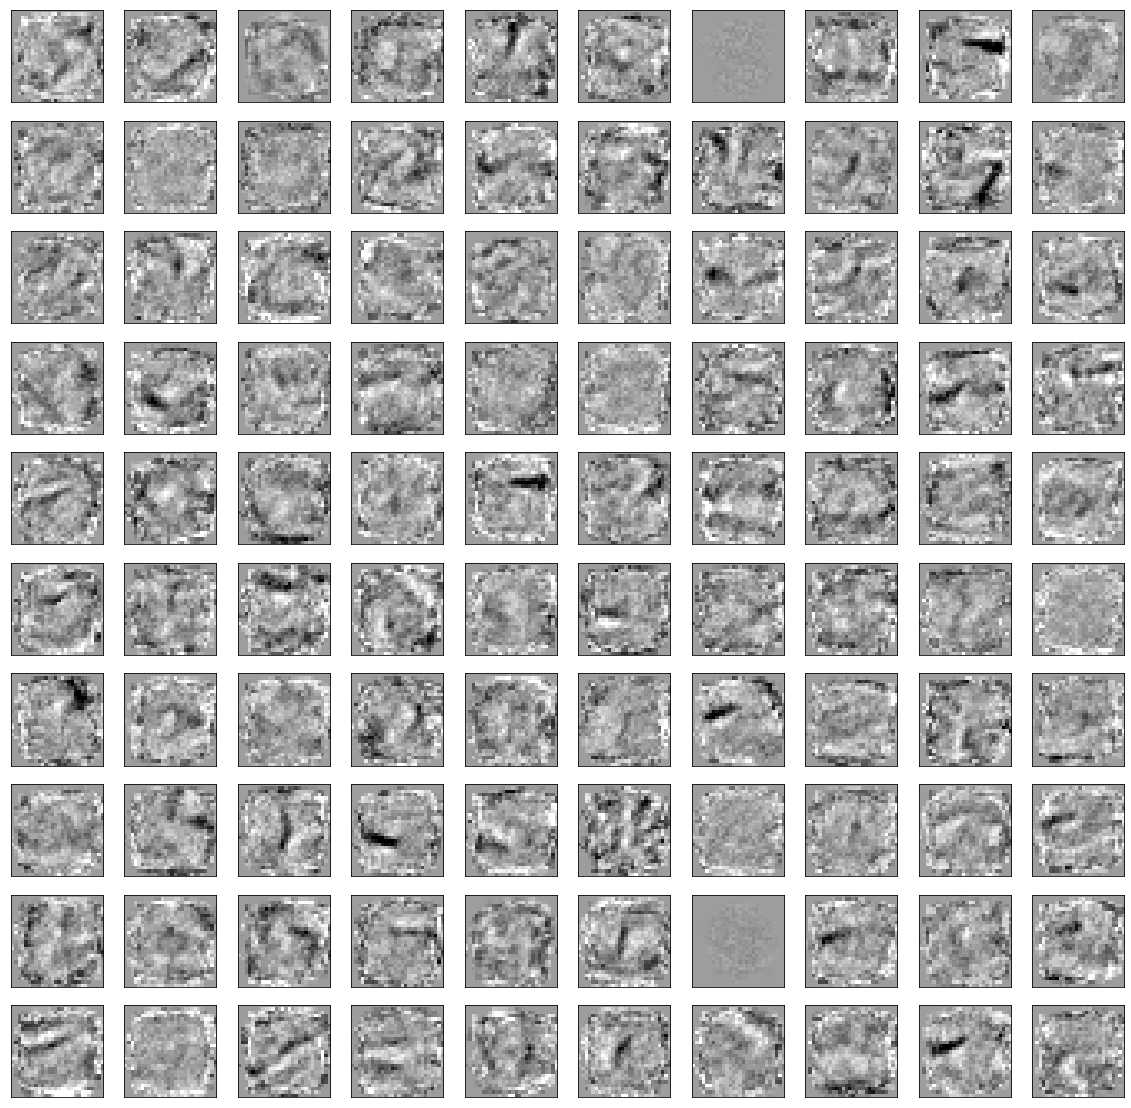

In [20]:
# visualize weights
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp_clf.coefs_[0].min(), mlp_clf.coefs_[0].max()

for coef, ax in zip(mlp_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

It is not 100% clear what these visualizations mean, but we can see some small features like different angles strokes.